In [ ]:
! pip install underthesea

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Import libery { run: "auto", display-mode: "form" }
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, LSTM
from keras.layers.embeddings import Embedding

import codecs
from underthesea import word_tokenize
import nltk
nltk.download('punkt')

from tensorflow.keras import layers
from tensorflow.keras import models
import string
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cd '/content/drive/MyDrive/KHMT/HK1_2021-2022/TinhToanDaPhuongTien/SentimentAnalyst'

/content/drive/MyDrive/KHMT/HK1_2021-2022/TinhToanDaPhuongTien/SentimentAnalyst


In [ ]:
# Tạo stop word vi
def create_stopwordlist():
    f = codecs.open( 'data/vietnamese-stopwords.txt')
    data = []
    null_data = []
    for i, line in enumerate(f):
        line = repr(line)
        line = line[1:len(line)-3]
        data.append(line)
    return data

In [ ]:
#https://www.kaggle.com/linhlpv/vietnamese-sentiment-analyst-base/data
filename = 'data/data - data.csv'
data = pd.read_csv(filename)

data.head(10)

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN
5,"Hàng rất đẹp, rất chi là ưng ý.",POS,5,NaN
6,"Chất lượng sản phẩm tốt, date dài.",POS,5,NaN
7,Ăn nói và thái độ phục vụ tốt.,POS,4,NaN
8,Đóng gói sản phẩm chắc chắn.,POS,5,NaN
9,tất sờn hết ca chưa dùng mà vay r.,NEG,2,NaN


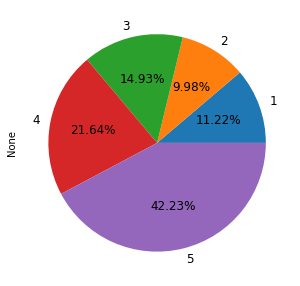

In [ ]:
data_label = data['rate']
data_label = pd.DataFrame(data_label, columns=['rate']).groupby('rate').size()
data_label.plot.pie(figsize=(5, 5), autopct="%.2f%%", fontsize=12)

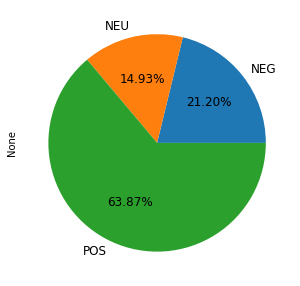

In [ ]:
data_label = data['label']
data_label = pd.DataFrame(data_label, columns=['label']).groupby('label').size()
data_label.plot.pie(figsize=(5, 5), autopct="%.2f%%", fontsize=12)

In [ ]:
data = data.values
print(data.shape)
comment = data[:,0]
label = data[:,1]
rate = data[:,2]
print(comment[:5])
print(label[:20])
print(rate[:20])

(31460, 4)
['Áo bao đẹp ạ!!' 'Tuyệt vời !' '2day ao khong giong trong.'
 'Mùi thơm,bôi lên da mềm da.' 'Vải đẹp, dày dặn.']
['POS' 'POS' 'NEG' 'POS' 'POS' 'POS' 'POS' 'POS' 'POS' 'NEG' 'POS' 'NEU'
 'POS' 'POS' 'POS' 'POS' 'POS' 'POS' 'POS' 'NEG']
[5 5 1 5 5 5 5 4 5 2 5 3 5 5 4 5 4 5 5 2]


In [ ]:
sentences = [nltk.word_tokenize(sent) for sent in comment]
print(sentences[:1])

[['Áo', 'bao', 'đẹp', 'ạ', '!', '!']]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
# kiểm tra từ điểm tạo trong tokenizer
#print(tokenizer.word_index)

In [ ]:
#texts_to_matrix(tokenizer, texts, mode = c("binary", "count", "tfidf", "freq"))
X = tokenizer.texts_to_matrix(sentences,mode='tfidf')
print('binary: ',X)

tfidf:  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.7230051  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.7230051  0.         ... 0.         0.         0.        ]
 [0.         0.7230051  0.         ... 0.         0.         0.        ]
 [0.         0.         1.62883947 ... 0.         0.         0.        ]]


In [ ]:
'''tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(sentences)
X = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(X)
print(X[:5])

In [ ]:
#Encode labels ở True_label 1,2,3,4,5 tương ứng thành 0,1,2,3,4

le = preprocessing.LabelEncoder()
label = le.fit_transform(label)
print(label)

[2 2 0 ... 2 2 2]


In [ ]:
list(le.inverse_transform([0, 1, 2]))

['NEG', 'NEU', 'POS']

In [ ]:
Y = tf.keras.utils.to_categorical(label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, label, 
                                            test_size=0.2, random_state=36)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train[:2])

(25168, 8782)
(6292, 8782)
[2 0]


In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# save the model
import pickle

filename = 'model_svm.pkl'
pickle.dump(model, open(filename, "wb"))

# load the model
model = pickle.load(open(filename, "rb"))

# use model to predict
#y_pred = model.predict(X_input)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1373
           1       0.48      0.15      0.23       925
           2       0.82      0.95      0.88      3994

    accuracy                           0.78      6292
   macro avg       0.67      0.61      0.61      6292
weighted avg       0.75      0.78      0.75      6292



In [ ]:
#Test du lieu ben ngoai
def pre_process(review):
    filename = 'data/data - data.csv'
    data = pd.read_csv(filename, encoding='utf-8')
    data.comment[0] = review
    
    sentences = [nltk.word_tokenize(sent) for sent in data.comment]

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    X = tokenizer.texts_to_matrix(sentences,mode='tfidf')
    
    return X[:1]

In [ ]:
review = 'tất sờn hết ca chưa dùng mà vay r'
review = pre_process(review)
print(review)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
result = model.predict(review)
pre = np.argmax(result)
print("Label predict: ", pre)

Label predict:  0


In [ ]:
review = 'Hàng rất đẹp, rất chi là ưng ý.'
review = pre_process(review)
#print(review)

result = model.predict(review)

pre = np.argmax(result)
print("Label predict: ", pre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Label predict:  0


In [ ]:
review = 'Quá đỉnh, cảnh quan rất tuyệt vời.'
review = pre_process(review)
#print(review)

result = model.predict(review)

pre = np.argmax(result)
print("Label predict: ", pre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
